# Orderbook Data

In order to incorporate orderbook data from poloniex, we will have to continually request the data through out the day and save it as table in our dataset. 

In [1]:
import json
import time
import requests
%matplotlib inline
from pylab import *
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas.io.json import json_normalize
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)}) 
from market_data import poloniex_api, get_trades

from IPython.core.display import HTML
HTML('<style>{}</style>'.format( open('style.css').read() ) )

** Get orderbook for BTC/XMR market **

In [136]:
orders = poloniex_api('returnOrderBook', {'depth': 500, 'currencyPair': 'BTC_XMR'})
orders =[
    {
        'price': float(order[0]), 
        'amount': float(order[1]),
        'type': order_type[:-1],
        'total': float(order[0]) * float(order[1])
    } 
        for order_type in ['asks','bids']
            for order in orders[order_type]
             
]
orders = pd.DataFrame(orders).sort_values(by='price')
orders.dtypes.to_frame(name='Data Type')

,Data Type
amount,float64
price,float64
total,float64
type,object


** Visualize the data **

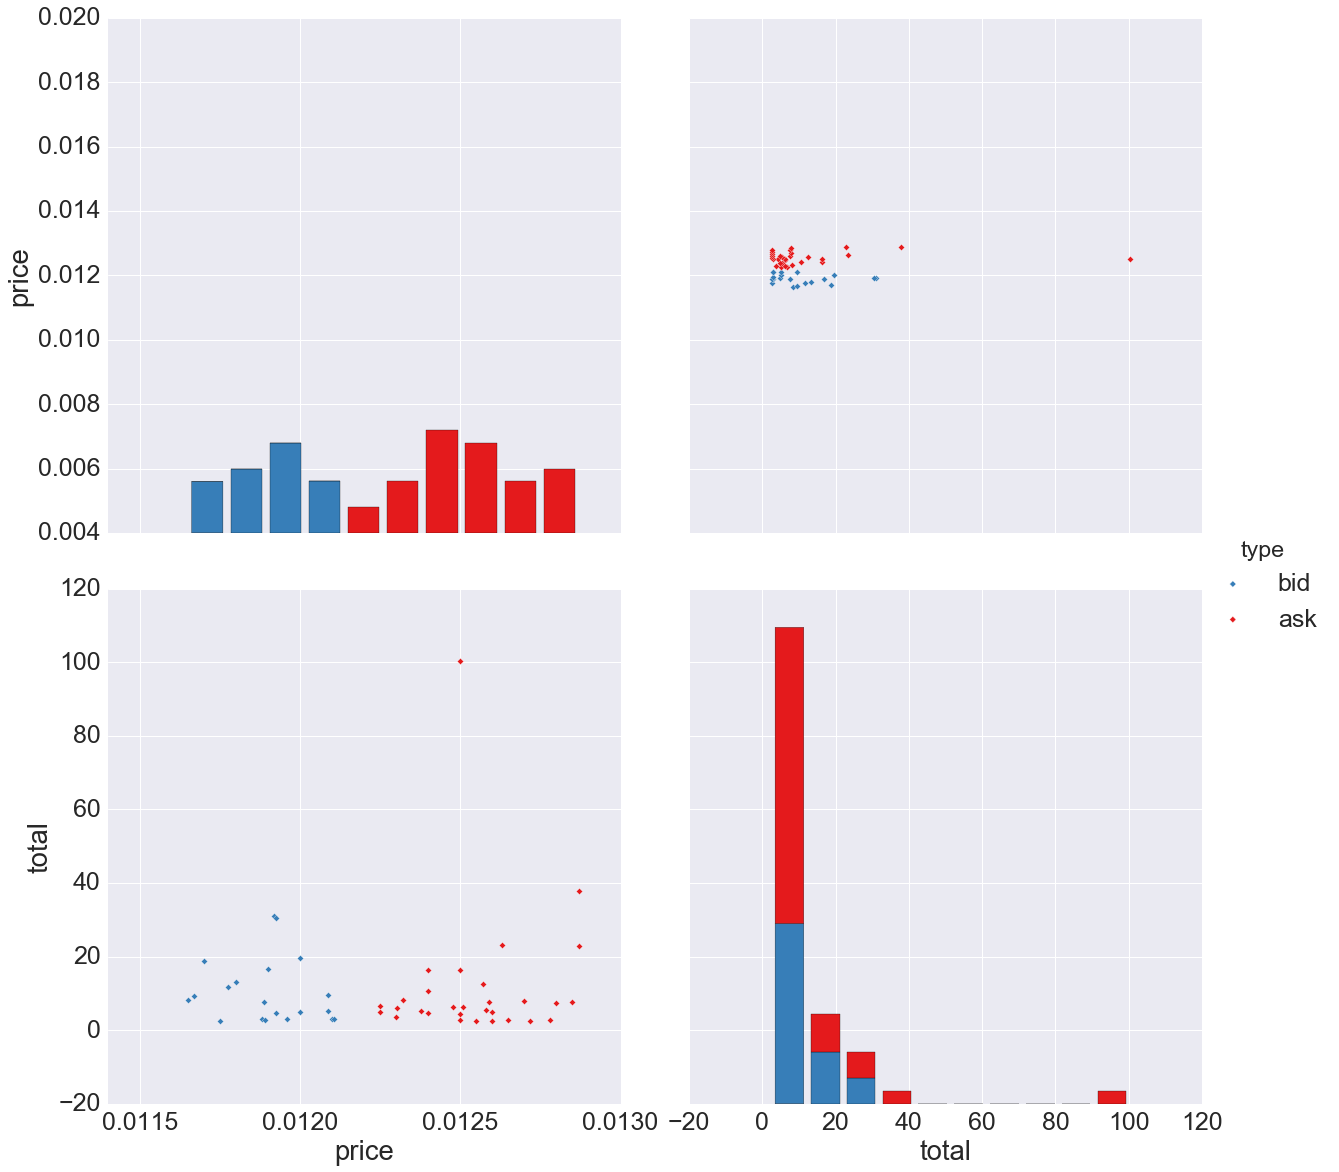

In [137]:
sns.set(font_scale=2.5)
high_vol_within_5pct = ((df.total>2.5) & (abs(df.price - df.price.mean()) / df.price < 0.05 ))
g = sns.pairplot(df[high_vol_within_5pct], hue='type', vars=["price", "total"], size=8.5, markers='D',
                 palette=sns.color_palette('Set1', n_colors=2)[::-1])

In this instance we can see that there are more buys than sells, particularly in the 10 to 2.5 BTC range. What's more there is a 100 BTC sell wall at 0.0125 XMR/BTC. This is clearly a sellers market and the following days demonstrate that. The graph below shows the market decling from when this snapshot of the the market depth was taken. 

In [5]:
trades = get_trades('BTC_XMR', datetime(2016,10,9), datetime(2016,10,11))

acquired 38548 total trades


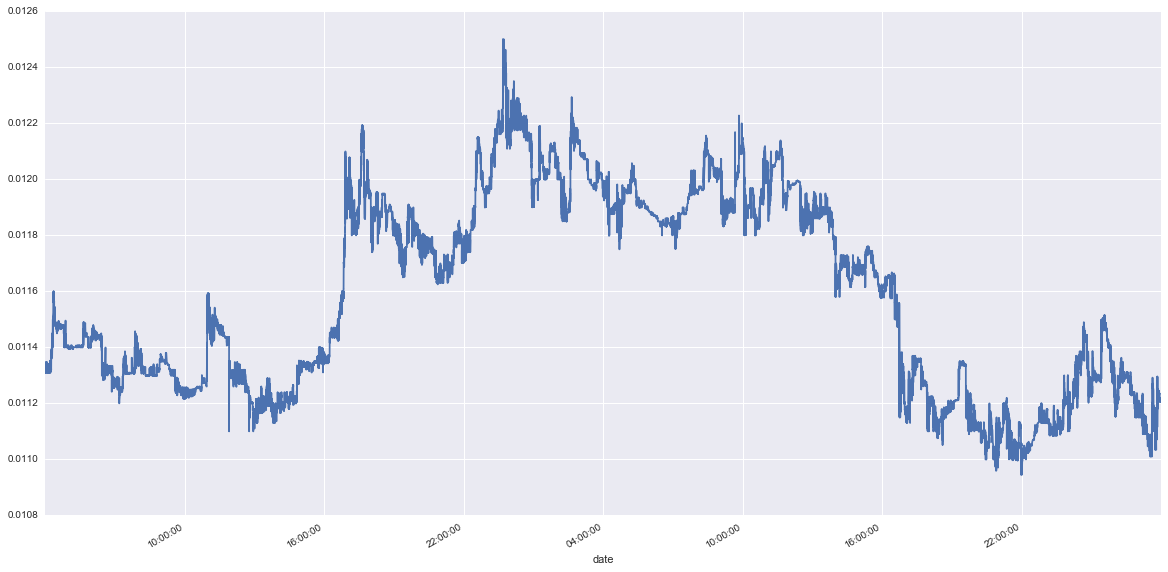

In [6]:
trades.set_index('date').rate.plot()

In [141]:
depth_levels = np.linspace(0,1,20) ** 2
totals = {}
for level in depth_levels: 
    within_level = ((orders.total>2) & (abs(orders.price - orders.price.mean()) / orders.price < level))
    
    for order_type in orders.type.unique():
        totals[level,order_type] = orders[within_level&(orders.type==order_type)].total.sum()
totals

{(0.0, 'ask'): 0,
 (0.0, 'bid'): 0,
 (0.0027700831024930744, 'ask'): 0,
 (0.0027700831024930744, 'bid'): 9.534308120013147,
 (0.011080332409972297, 'ask'): 10.525876369486399,
 (0.011080332409972297, 'bid'): 121.21568976938191,
 (0.024930747922437671, 'ask'): 31.100091275284786,
 (0.024930747922437671, 'bid'): 274.40826352537937,
 (0.04432132963988919, 'ask'): 141.61448848320558,
 (0.04432132963988919, 'bid'): 353.17516068449146,
 (0.069252077562326861, 'ask'): 289.0555057841527,
 (0.069252077562326861, 'bid'): 592.5628405875786,
 (0.099722991689750684, 'ask'): 630.1003891740448,
 (0.099722991689750684, 'bid'): 717.5565838894514,
 (0.13573407202216065, 'ask'): 630.1003891740448,
 (0.13573407202216065, 'bid'): 719.9168760694337,
 (0.17728531855955676, 'ask'): 630.1003891740448,
 (0.17728531855955676, 'bid'): 719.9168760694337,
 (0.22437673130193903, 'ask'): 630.1003891740448,
 (0.22437673130193903, 'bid'): 719.9168760694337,
 (0.27700831024930744, 'ask'): 630.1003891740448,
 (0.27700831